<a href="https://colab.research.google.com/github/evelynnmeow/ANLY590NeuralNets/blob/master/ANLY590_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem 1

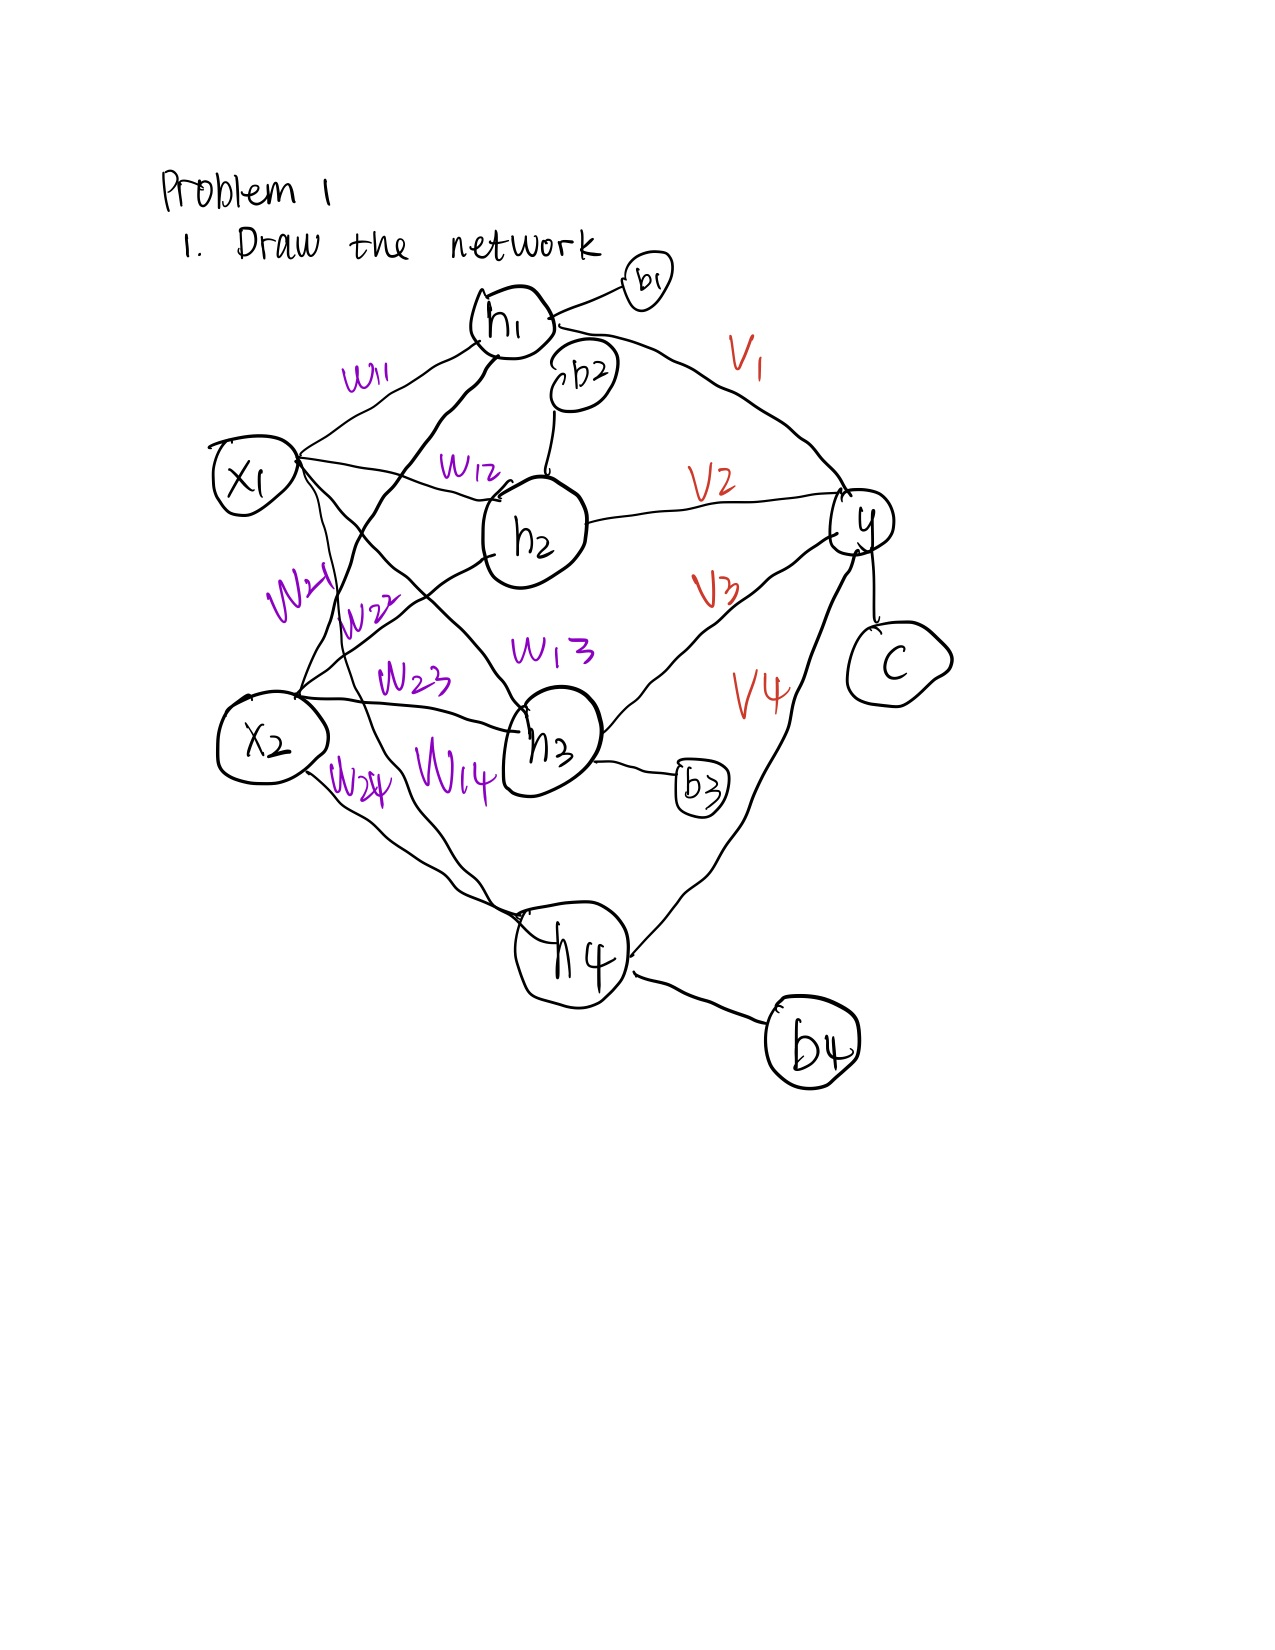

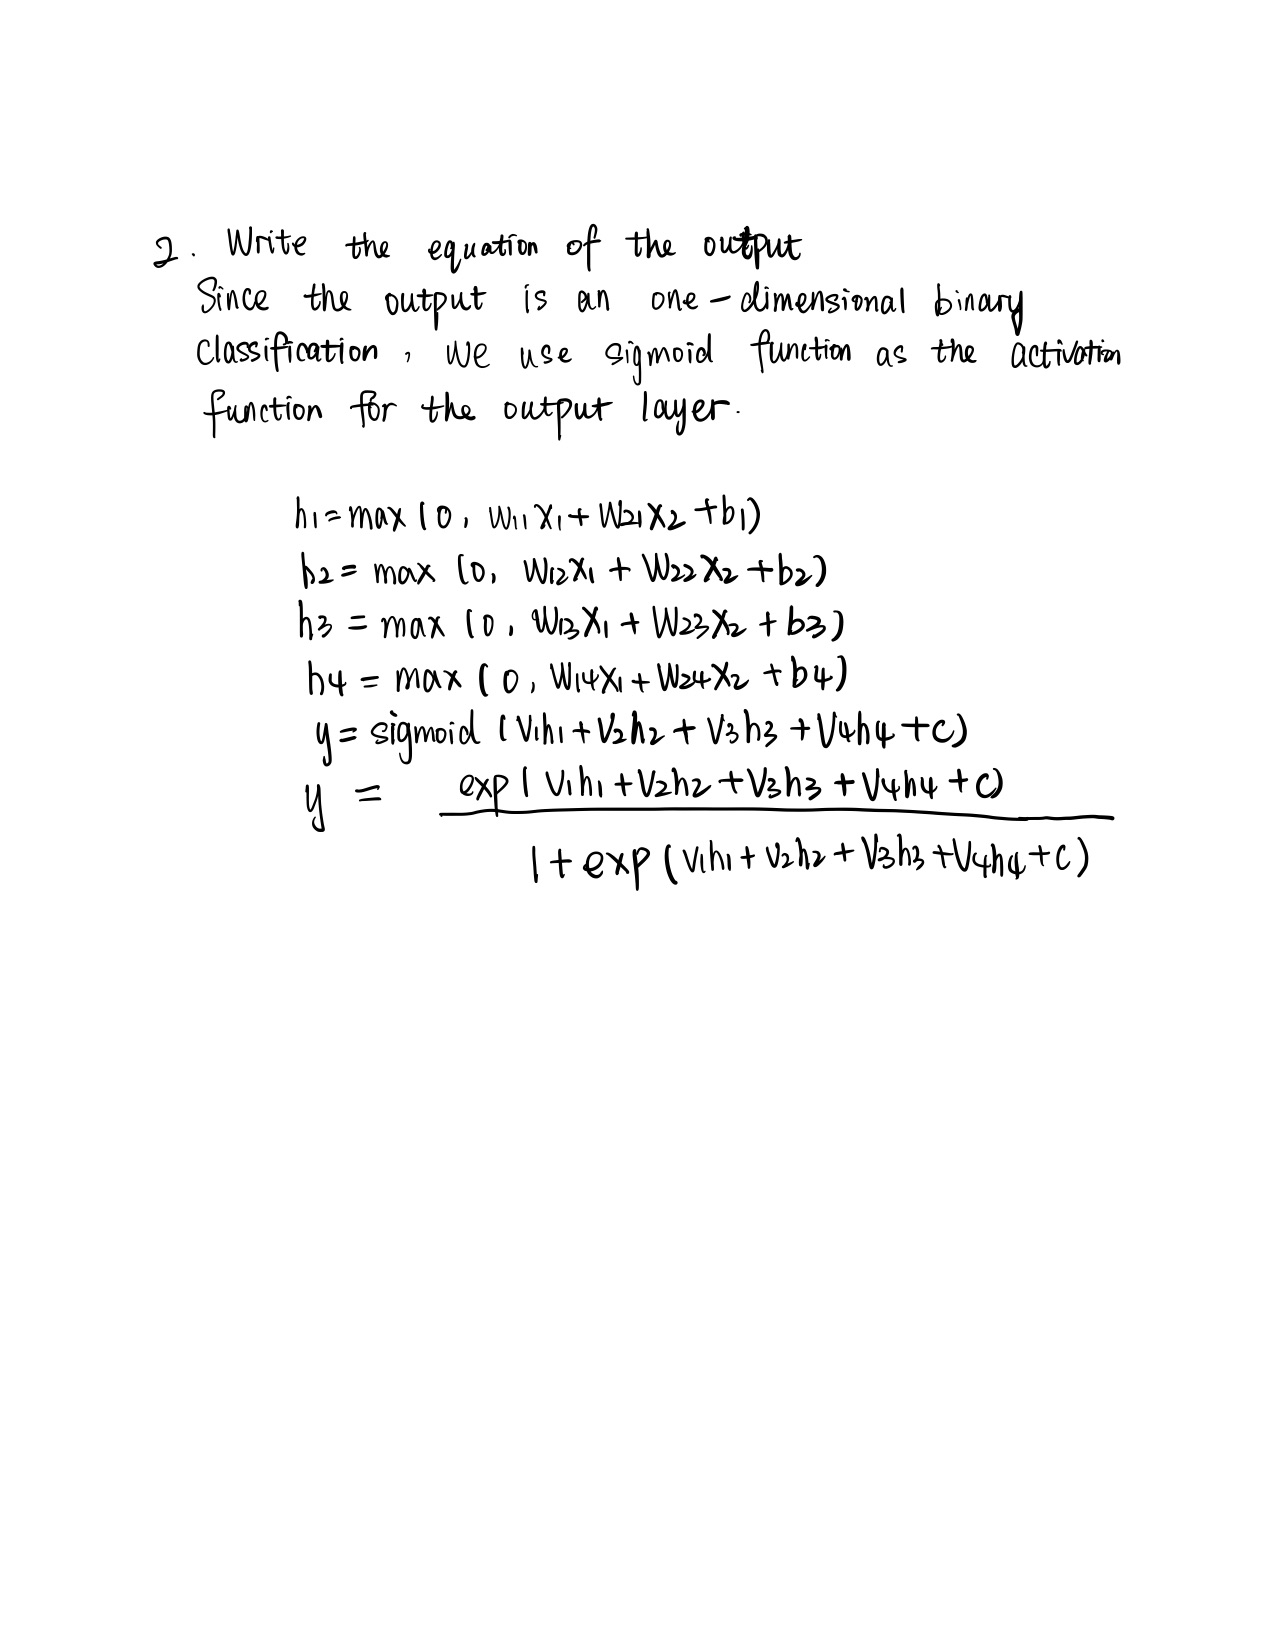

In [1]:
# Part 3
import numpy as np
# for binary output
def sigmoid(x):
    return 1/(1+np.exp(-x))
# for relu
def relu(x):
    return np.maximum(x,0)
# for prediction
def ff_nn_Relu(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y_hat = sigmoid(np.dot(h,v) + c)
    return y_hat


In [2]:
# Part 4
# weights for the first layer
W_1 = np.matrix([[1, 0],
                [-1, 0],
                [0, 0.5],
                [1,1]])
# bias for the first layer
b_1 = np.array([[0],
               [0],
               [1],
               [0]])
# input matrix
X = np.matrix([[1, 0, 0], [-1, -1, 1]])

# weights for the second layer
V = np.array([1, 0, -1, -1])
c = 1

# first hidden layer
h1 = relu(W_1.dot(X)+b_1)
print(h1)

z = V.dot(h1) + c
print(z)

y_hat = sigmoid(z)
print(y_hat)

[[1.  0.  0. ]
 [0.  0.  0. ]
 [0.5 0.5 1.5]
 [0.  0.  1. ]]
[[ 1.5  0.5 -1.5]]
[[0.81757448 0.62245933 0.18242552]]


##### Problem 2
Part 1
$$
\frac{\partial f}{\partial x} = -3x^2 - 100(2y^2 - x)
$$
$$
\frac{\partial f}{\partial y} = 400y(2y^2-x)
$$

In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from matplotlib import ticker
from math import cos, sin, atan

%matplotlib inline
warnings.filterwarnings("ignore")

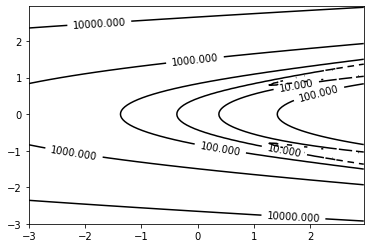

In [4]:
# part 2
def f(x, y):
    return (3 - x ** 3) + 50 * (2*y**2 - x) ** 2


def draw_contour():
    delta = 0.05
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.contourf(X, Y, f(X, Y), 5, alpha=0, cmap=plt.cm.hot)
    C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
    plt.clabel(C, inline=True, fontsize=10)
    plt.show()
    

draw_contour()

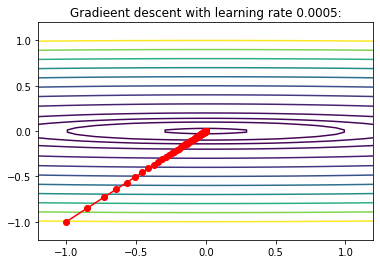

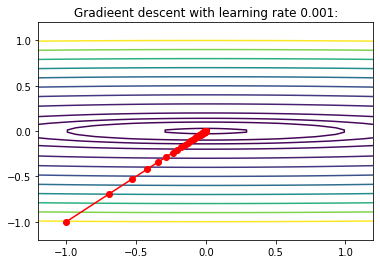

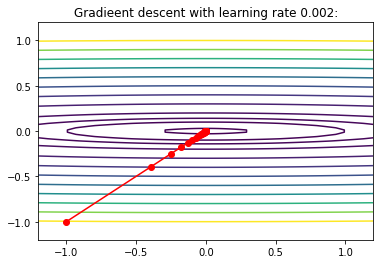

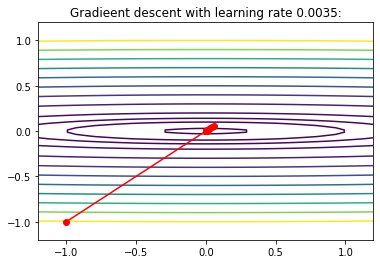

In [5]:
def f(x):
    return (3 - x[0] ** 3) + 50 * (2*x[1]**2 - x[0]) ** 2

def grad(x):
    return np.array(-3*x[0]**2 - 100 * (2*x[1]**2 - x[0]), 400 * x[1]*(2*x[1]**2 - x[0]))

def gd(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1,:] = x
    return xs


def grad_graph(iterations, learning_rate):
    alpha = learning_rate
    x0 = np.array([-1,-1])
    xs = gd(x0, grad, alpha, max_iter=iterations)

    x = np.linspace(-1.2, 1.2, 100)
    y = np.linspace(-1.2, 1.2, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
    Z = x**2 + 100*Y**2
    c = plt.contour(X, Y, Z, levels)
    plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
    plt.title('Gradieent descent with learning rate {lr}:'.format(lr = learning_rate))
    plt.show()

grad_graph(6000, 0.0005)    
grad_graph(6000, 0.001)
grad_graph(6000, 0.002)
grad_graph(6000, 0.0035)


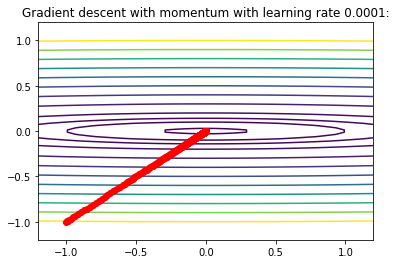

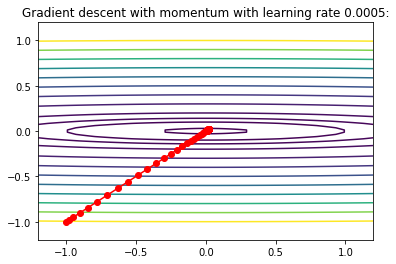

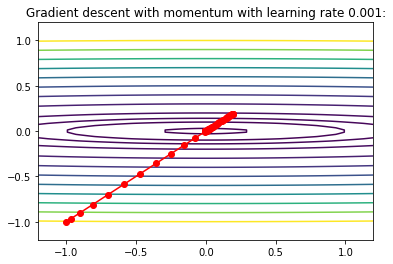

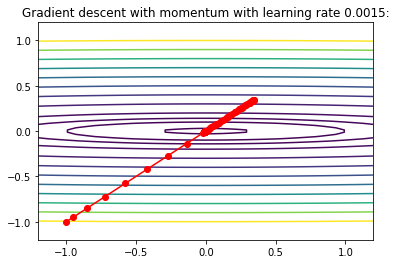

In [6]:
def f2(x):
    return (3 - x[0] ** 3) + 50 * (2*x[1]**2 - x[0]) ** 2

def grad2(x):
    return np.array(-3*x[0]**2 - 100 * (2*x[1]**2 - x[0]), 400 * x[1]*(2*x[1]**2 - x[0]))

def gd2(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1,:] = x
    return xs

def gd2_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1, :] = x
    return xs
def grad_graph_m(iterations, learning_rate, beta=0.8):
    alpha = learning_rate
    x0 = np.array([-1,-1])
    xs = gd2_momentum(x0, grad2, alpha, beta=beta, max_iter=iterations)

    x = np.linspace(-1.2, 1.2, 100)
    y = np.linspace(-1.2, 1.2, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
    Z = x**2 + 100*Y**2
    c = plt.contour(X, Y, Z, levels)
    plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
    plt.title('Gradient descent with momentum with learning rate {lr}:'.format(lr = learning_rate))
    plt.show()
    
grad_graph_m(6000, 0.0001)
grad_graph_m(6000, 0.0005)
grad_graph_m(6000, 0.001)
grad_graph_m(1000, 0.0015)



##### Problem 3

Part 1

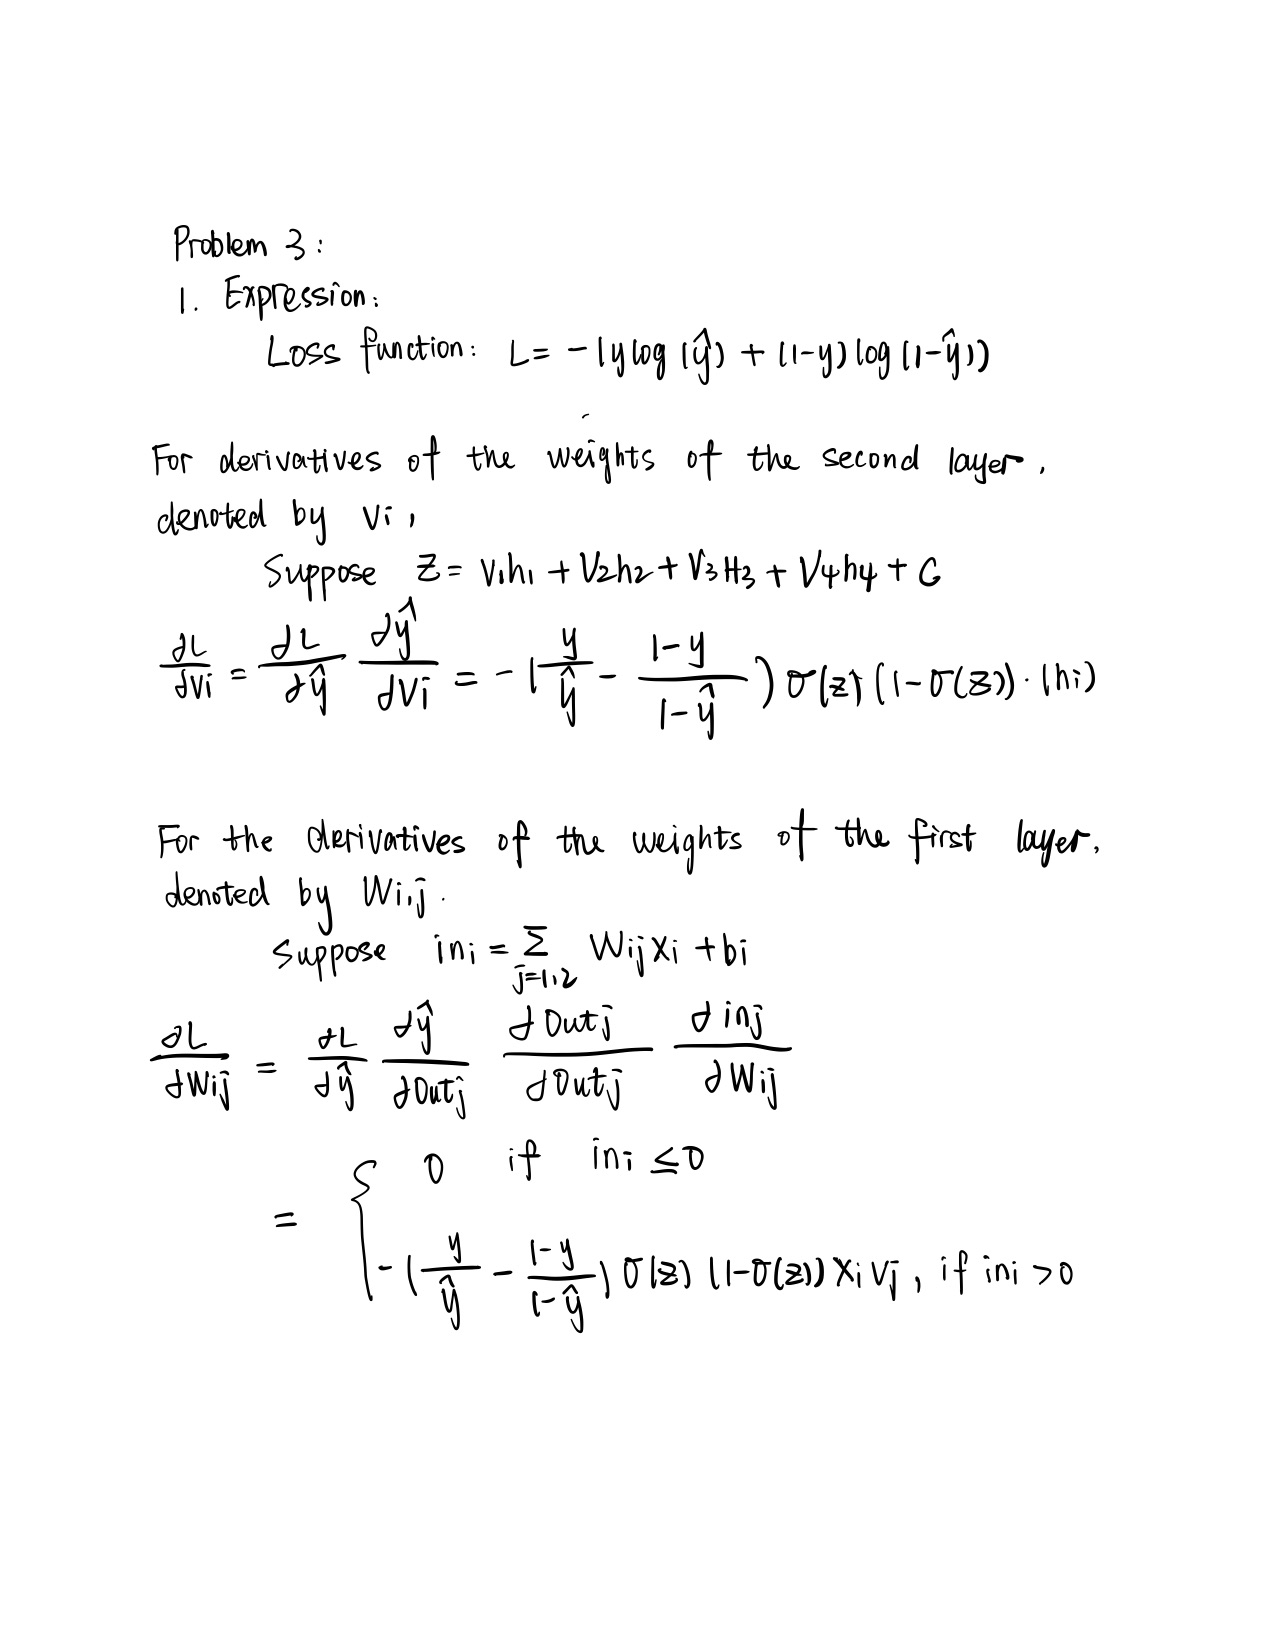

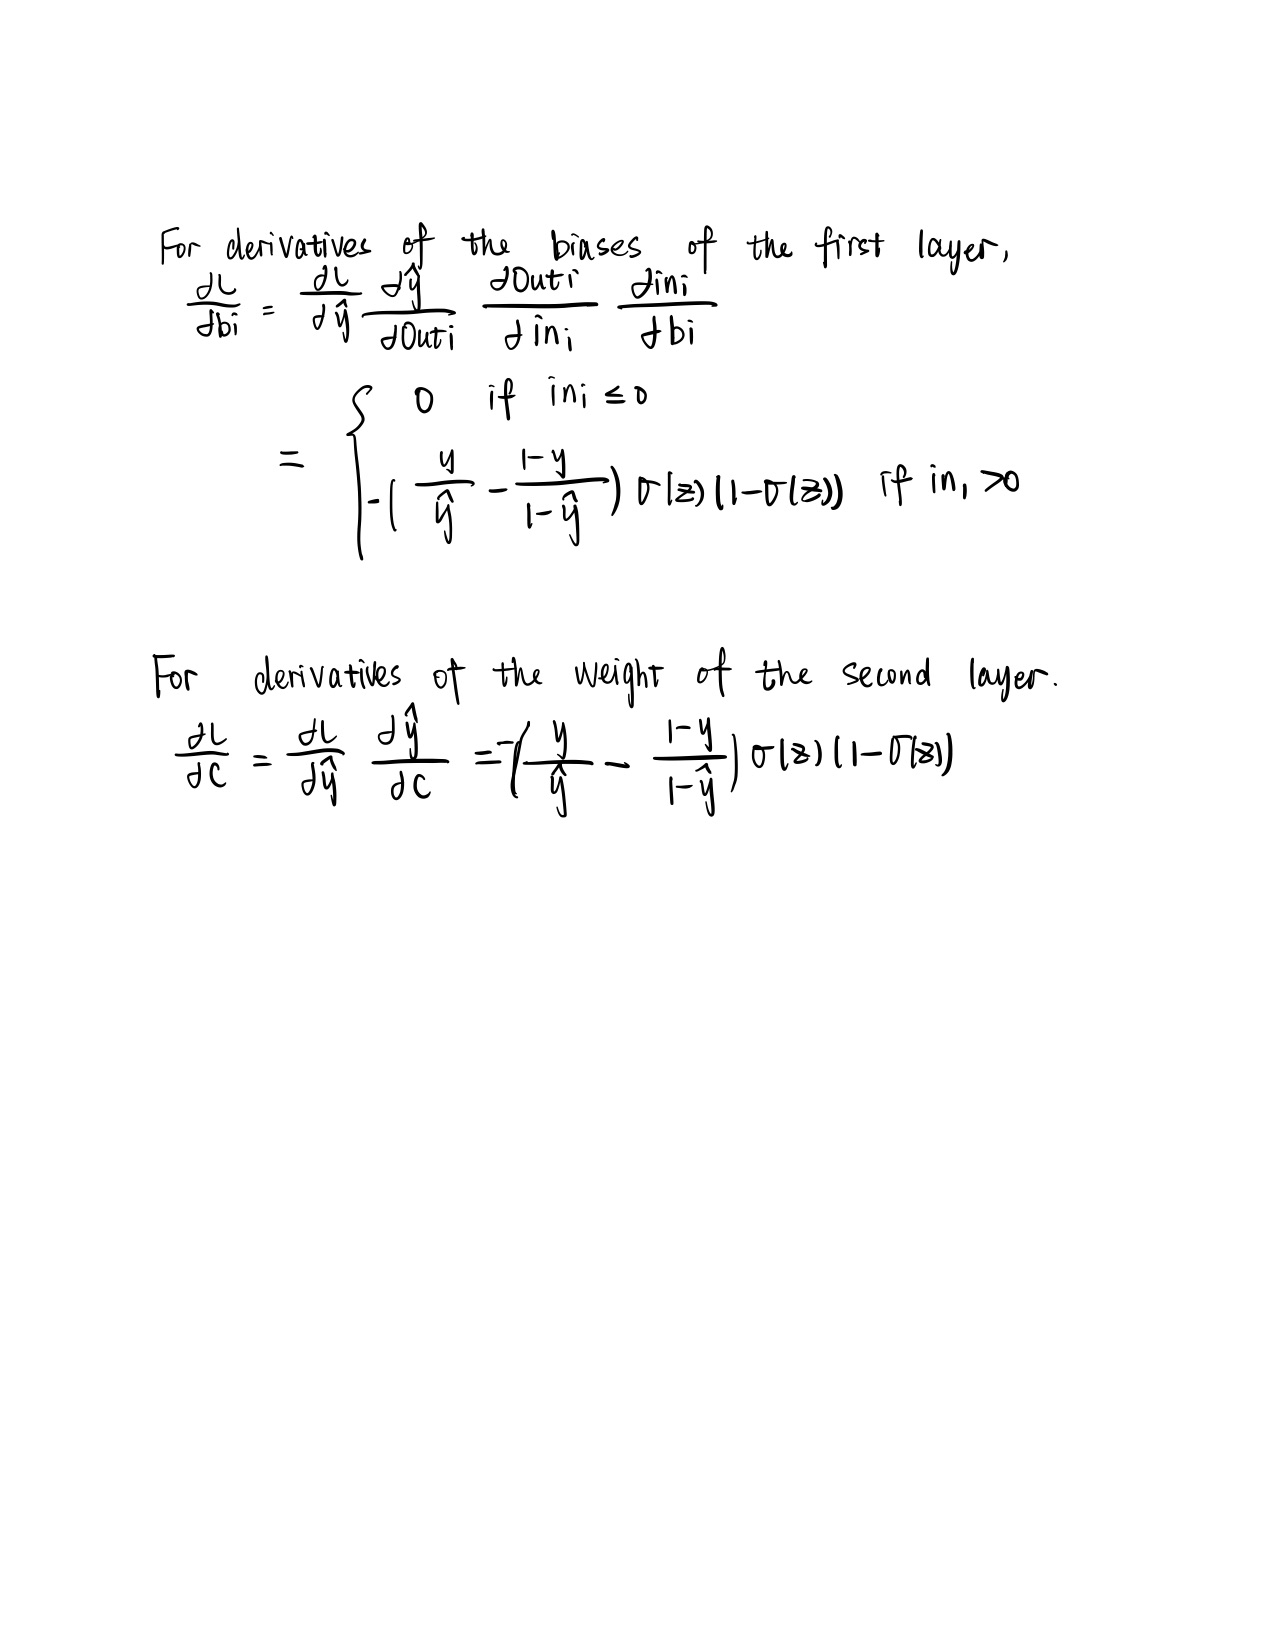

Part 2

In [7]:
def relu(x, derivative=False):
    r = np.where(x > 0, x, 0)
    if derivative == True:
        return np.where(x > 0, 1, 0)
    return r

def sigmoid(x, derivative=False):
    s = 1.0 / (1.0 + np.exp(-x))
    if derivative == True:
        return s * (1.0 - s)
    return s

def loss_f(y, y_hat):
    loss = y * np.log(y_hat)+(1 - y) * np.log(1 - y_hat)
    return -sum(loss)

def grad_f(X, Y, W, V, b, c):
    y = Y
    in_put = np.array(np.dot(X, W) + b)
    h = relu(in_put)
    y_hat = sigmoid(np.dot(h, V) + c)
    dLdc = (y_hat-y).sum()
    dLdV = np.dot(h.T, y_hat - y)
    dLdb = (np.dot(y_hat - y, V.T) * relu(in_put, derivative = True)).sum(axis=0)
    dLdW = np.dot(X.T, np.dot(y_hat-y, V.T)*relu(in_put, derivative = True))   
    
    return (dLdW, dLdV, dLdb, dLdc)

part 3

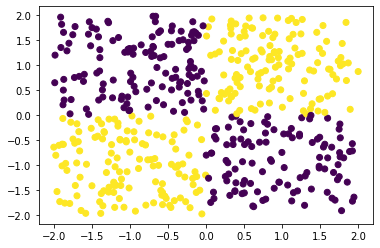

In [8]:
x_xor = np.random.uniform(low = -2,high = 2, size=1000).reshape((500,2))
y_xor = np.zeros((500,1))

y_xor[np.logical_and(x_xor[:,0] > 0, x_xor[:,1] > 0)] = 1
y_xor[np.logical_and(x_xor[:,0] < 0, x_xor[:,1] < 0)] = 1

plt.scatter(x_xor[:,0], x_xor[:,1], c = y_xor[:,0])
plt.show()

part 4

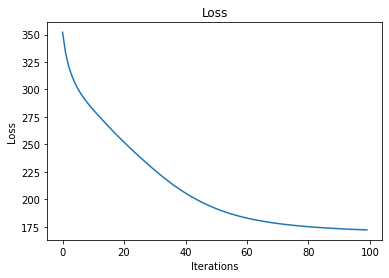

In [11]:
x = x_xor
y = y_xor
W = np.array([[1, -1, 0],
             [0, 0, .5]])
b = np.array([0, 0, 1])
V = np.array([[1], [0], [-1]])
c = np.array([1])

loss = []

alpha = 0.001
    
for i in range(100):
    gradient = grad_f(x, y, W, V, b, c)
    
    dLdW, dLdV, dLdb, dLdc = gradient
    
    W = W - alpha * dLdW
    b = b - alpha * dLdb
    V = V - alpha * dLdV
    c = c - alpha * dLdc
    xw = np.dot(x, W) + b
    xw[xw < 0] = 0
    output  = np.dot(xw, V) + c
    y_hat = 1. / (1 + np.exp(-output))
    
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

plt.plot(range(0,100), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

part 5: with momentum

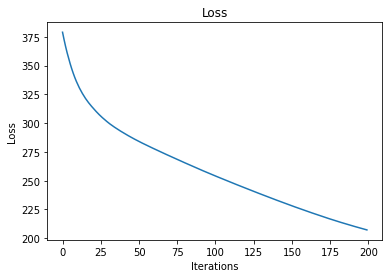

In [12]:
x = x_xor
y = y_xor
W = np.array([[1, -1, 0],
             [0, 0, .5]])
b = np.array([0, 0, 1])
V = np.array([[1], [0], [-1]])
c = np.array([1])
vs = np.zeros(x.size)
params = (W, V, b, c)

trajectory = []
loss = []

alpha = 0.0001
epsilon = 0.0001

for i in range(1000):    
    gradients = grad_f(x, y, W, V, b, c)
    new_params = []  
    for (i, m, v) in zip(params, gradients, vs):
        new_params.append(i - epsilon * m - alpha * v)
        
    vs = gradients
    params = tuple(new_params)
    
    W, V, b, c = params
    
    h = relu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h, V) + c)
    
    trajectory.append(params)
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


plt.plot(range(0,200), loss[0:200])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()


The function seems to converge more efficiently. 

Part 6

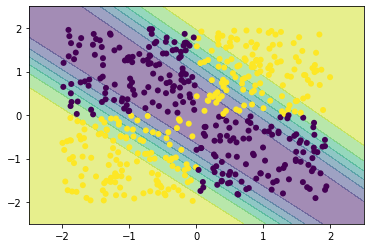

In [15]:
def y_hat(x, params):
    W, V, b, c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
x1, y1 = np.meshgrid(x_span, y_span)
values = y_hat(np.c_[x1.ravel(), y1.ravel()], trajectory[-1])
z = values.reshape(x1.shape)
fig, ax = plt.subplots()
ax.contourf(x1, y1, z, alpha=0.5)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()